# Análise dos dados referente à estudantes de duas escolas portuguesas

O objetivo desta análise é estudar possíveis razões que justifiquem as diferentes notas finais entre os alunos.

In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 21)

df = pd.read_csv("StudAlcoCons.csv")

#Abaixo, removo variáveis que não serão utilizadas na análise e trato algumas que serão utilizadas
df = df.drop(['paid', 'activities', 'nursery', 'higher', 'romantic', 'schoolsup', 'internet', 'health', 'failures', 'famrel', 'guardian', 'famsup', 'reason', 'Dalc', 'Walc', 'freetime', 'goout', 'G1', 'G2'], 1)
df['Medu'] = df['Medu'].astype(str)
df['Fedu'] = df['Fedu'].astype(str)
df['studytime'] = df['studytime'].astype(str)
df['traveltime'] = df['traveltime'].astype(str)
df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,schoolsup,internet,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,2,2,yes,no,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,1,2,no,yes,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,1,2,yes,yes,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,1,3,no,yes,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,1,2,no,no,4,10


# Variáveis na base de dados:

Segue a descrição de cada variável que será utilizada:

1. school - Escola do estudante (binário: "GP" - Gabriel Pereira ou "MS" - Mousinho da Silveira)

2. sex - Sexo do estudante (binário: "F" - Feminino ou "M" - Masculino)

3. age - Idade do estudante (numérico: de 15 à 22)

4. address - Tipo de endereço do estudante (binário: "U" - urbano ou "R" - rural)

5. famsize - Tamanho da família (binário: "LE3" - menor ou igual a 3 or "GT3" - maior que 3)

6. Pstatus - Status de coabitação dos pais (binário: "T" - vivendo juntos or "A" - separados)

7. Medu - Educação da mãe (numérico: 0 - Não possui,  1 - primário, 2 – fundamental, 3 – médio or 4 – superior)

8. Fedu - Educação do pai (numérico: 0 - Não possui,  1 - primário, 2 – fundamental, 3 – médio or 4 – superior)

9. Mjob - Trabalho da mãe (nominal: "teacher" professor, "health" saúde, "services" serviço, "at_home" em casa ou "other" outro)

10. Fjob - Trabalho do pai (nominal: "teacher" professor, "health" saúde, "services" serviço, "at_home" em casa ou "other" outro)

12. traveltime - Tempo de viagem casa/escola (numérico: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hora, or 4 - >1 hora)

13. studytime - Tempo de estudo / semana (numérico: 1 - <2 horas, 2 - 2 to 5 horas, 3 - 5 to 10 horas, or 4 - >10 horas)

14. absences - Número de faltas na escola (numérico: de 0 à 93)

15. G3 - Nota final (numérico: de 0 à 20)

# Início das análises

## Análises Preliminares

In [64]:
df.shape

(395, 16)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  traveltime  395 non-null    object
 11  studytime   395 non-null    object
 12  schoolsup   395 non-null    object
 13  internet    395 non-null    object
 14  absences    395 non-null    int64 
 15  G3          395 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 49.5+ KB


In [66]:
df.describe()

,age,absences,G3
count,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000
50%,17.000000,4.000000,11.000000
75%,18.000000,8.000000,14.000000
max,22.000000,75.000000,20.000000


A base de dados possui o registro de 395 alunos com idades variando entre 15 anos e 22 anos, onde 50% possuem menos de 17 anos e apenas 25% ficaram com uma nota final acima de 14 pontos. Além disso 75% dos estudantes possuem menos de 8 faltas no ano.

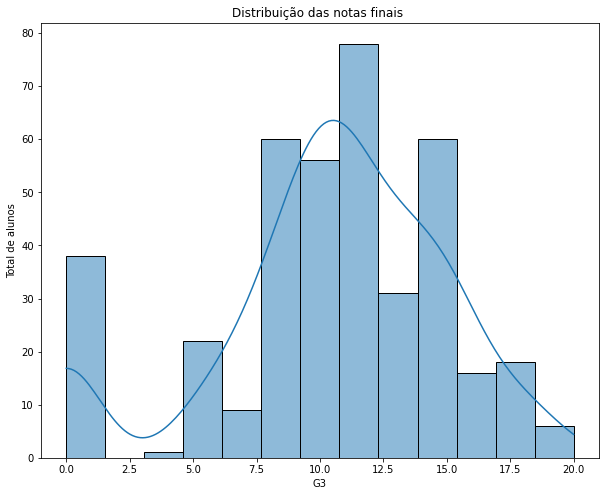

In [60]:
plt.figure(figsize = (10, 8))

sns.histplot(data = df, x = "G3", kde = True)
plt.title('Distribuição das notas finais ')
plt.ylabel('Total de alunos')
plt.show()

Pelo histograma pode-se notar que a maior parte das notas estão mais concentradas por volta de 7,5 à 16.

## Sexo dos Alunos

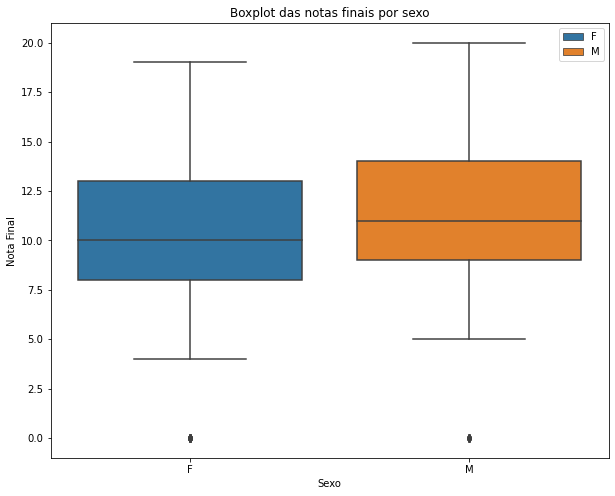

In [59]:
plt.figure(figsize = (10, 8))

sns.boxplot(x = 'sex', y = 'G3', data = df, hue = 'sex', dodge=False)
plt.title('Boxplot das notas finais por sexo')
plt.xlabel('Sexo')
plt.ylabel('Nota Final')
plt.legend()
plt.show()

Observe que a "caixa" referente ao sexo masculino está numa posição mais alta, indicando que, em média, as notas finais dos homens foram maiores do que as das mulheres.

## Tipo de Endereço

In [59]:
df.groupby(['address']).agg({"G3": "mean"})

,G3
address,
R,9.511364
U,10.674267


Veja que a nota final média dos alunos de áreas urbanas foi maior do que dos alunos das áreas rurais em cerca de 1 ponto. No entanto, para determinar se essa diferença foi significativa seria necessário realizar um Teste de Hipóteses sobre a nota final média em relação aos dois tipos de endereço. 

## Tamanho da Família

GT3    281
LE3    114
Name: famsize, dtype: int64


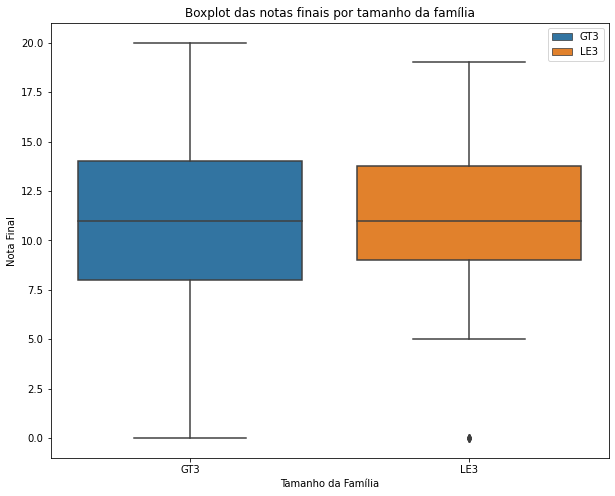

In [58]:
plt.figure(figsize = (10, 8))

print(df['famsize'].value_counts())

sns.boxplot(x = 'famsize', y = 'G3', data = df, hue = 'famsize', dodge=False)
plt.title('Boxplot das notas finais por tamanho da família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Nota Final')
plt.legend()
plt.show()

Observe que, apesar de mediana e terceiro quartil iguais, a nota final dos alunos com famílias com mais de 3 membros esteve mais distribuida do que aqueles com menos de 3 membros na família. Uma coisa que pode justificar essa diferença é que o grupo GT3 possuía muito mais alunos, referencialmente, trazendo maior variabilidade de notas.

## Status de Coabitação dos Pais

                G3
Pstatus           
A        11.195122
T        10.324859


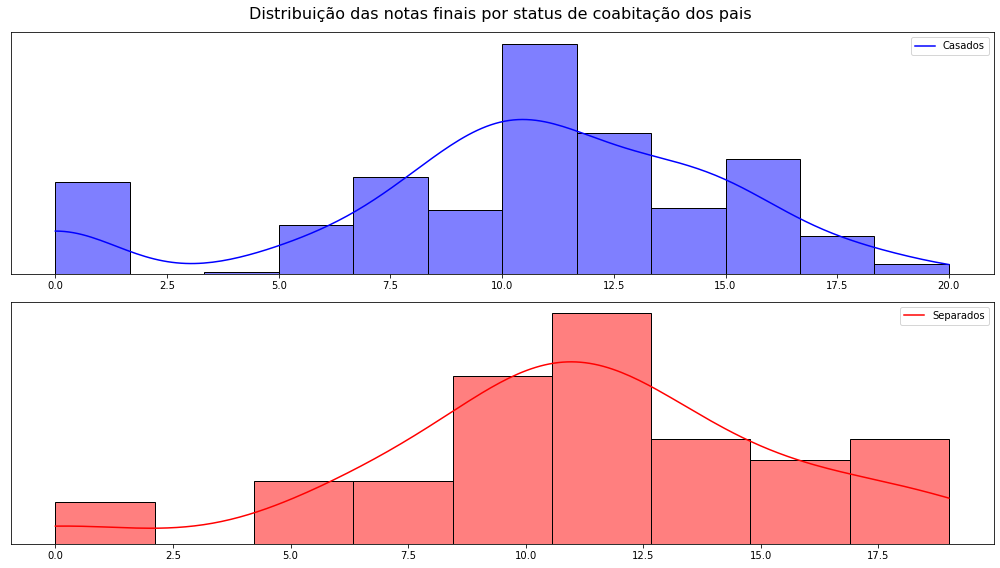

In [16]:
df_t = df[df['Pstatus'] == "T"]
df_a = df[df['Pstatus'] == "A"]

print(df.groupby(['Pstatus']).agg({"G3": "mean"}))

#plt.figure(figsize = (10, 8))
fig, axes = plt.subplots(2, 1, figsize = (14, 8))

ax = sns.histplot(data = df_t, x = "G3", kde = True, ax = axes[0], color = "blue")
ax.set(xlabel = None, ylabel = None)
ax.legend(["Casados"])

ax1 = sns.histplot(data = df_a, x = "G3", kde = True, ax = axes[1], color = "red")
ax1.set(xlabel = None, ylabel = None)
ax1.legend(["Separados"])

plt.setp(axes, 
         yticks=[])
plt.suptitle('Distribuição das notas finais por status de coabitação dos pais',
             fontsize = 16)
plt.tight_layout()
plt.show()

As distribuiçõeso das notas do alunos com pais casados e separados apresentam comportamento relativamente similares, como pode ser visto nos histogramas acima. Além disso, a diferença entre a nota final média dos alunos foi de menos de 1 ponto, indicando que os pais serem separados ou casados pode não afetar o rendimento dos alunos em sala de aula.

## Nível de Educação dos Pais

In [32]:
print("Média da nota final por nível de educação da mãe\n")
print(df.groupby(['Medu']).agg({"G3": "mean"}))

Média da nota final por nível de educação da mãe

             G3
Medu           
0     13.000000
1      8.677966
2      9.728155
3     10.303030
4     11.763359


In [33]:
print("Distribuição do nível de escolaridade das mães dos alunos\n")
print(df['Medu'].value_counts())

Distribuição do nível de escolaridade das mães dos alunos

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


Acima pode-se observar que a nota média dos alunos com mãe sem nenhum nível de educação foi maior. Isso pode estar relacionado a baixa amostra desse caso, visto que dentre os 395 alunos, somente 3 estavam no grupo 0. Tirando essa exceção, observa-se que quanto maior o nível de educação da mãe, maior foi a nota final média do aluno.

In [36]:
print("Média da nota final por nível de educação do pai\n")
print(df.groupby(['Fedu']).agg({"G3": "mean"}))

Média da nota final por nível de educação da mãe

             G3
Fedu           
0     13.000000
1      9.158537
2     10.260870
3     10.660000
4     11.364583


In [37]:
print("Distribuição do nível de escolaridade dos pais dos alunos\n")
print(df['Fedu'].value_counts())

Distribuição do nível de escolaridade das mães dos alunos

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


A mesma relação observada no caso das mães é observada para o nível de educação dos pais e sua relação com a nota final dos estudantes.

## Tipo de Trabalho dos Pais

In [40]:
print("Média da nota final por tipo de trabalho da mãe\n")
print(df.groupby(['Mjob']).agg({"G3": "mean"}))

Média da nota final por tipo de trabalho da mãe

                 G3
Mjob               
at_home    9.152542
health    12.147059
other      9.822695
services  11.019417
teacher   11.051724


In [39]:
print("Distribuição do tipo de trabalho das mães dos alunos\n")
print(df['Mjob'].value_counts())

Distribuição do tipo de trabalho das mães dos alunos

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


Alunos que a mãe trabalha na área da saúde ou na educação tiveram uma nota final média maior que os outros casos.

In [41]:
print("Média da nota final por tipo de trabalho do pai\n")
print(df.groupby(['Fjob']).agg({"G3": "mean"}))

Média da nota final por tipo de trabalho do pai

                 G3
Fjob               
at_home   10.150000
health    11.611111
other     10.193548
services  10.297297
teacher   11.965517


In [42]:
print("Distribuição do tipo de trabalho dos pais dos alunos\n")
print(df['Fjob'].value_counts())

Distribuição do tipo de trabalho dos pais dos alunos

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


A mesma relação que existe com as mães ocorre com os pais. Além disso, uma coisa que se nota é que existem muito mais mãe no grupo "em casa", mas também estão mais presentes nos grupos "saúde" e "educação", em relação aos pais.

## Tempo de Viagem até a Escola

Distribuição do tempo de viagem até a escola dos alunos

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


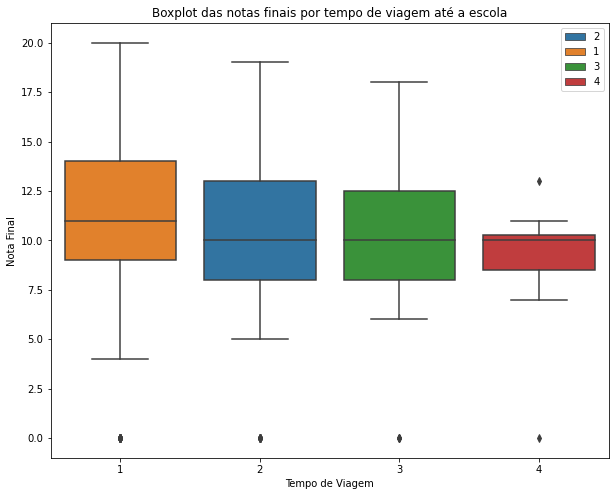

In [57]:
plt.figure(figsize = (10, 8))

print("Distribuição do tempo de viagem até a escola dos alunos\n")
print(df['traveltime'].value_counts())

sns.boxplot(x = 'traveltime', y = 'G3', data = df, hue = 'traveltime', dodge=False, order = ['1', '2', '3', '4'])
plt.title('Boxplot das notas finais por tempo de viagem até a escola')
plt.xlabel('Tempo de Viagem')
plt.ylabel('Nota Final')
plt.legend()
plt.show()

Os boxplot deixam claro que quanto menor o tempo de viagem, melhor foram as notas finais.

## Tempo de Estudo

Distribuição do tempo de estudo dos alunos

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64


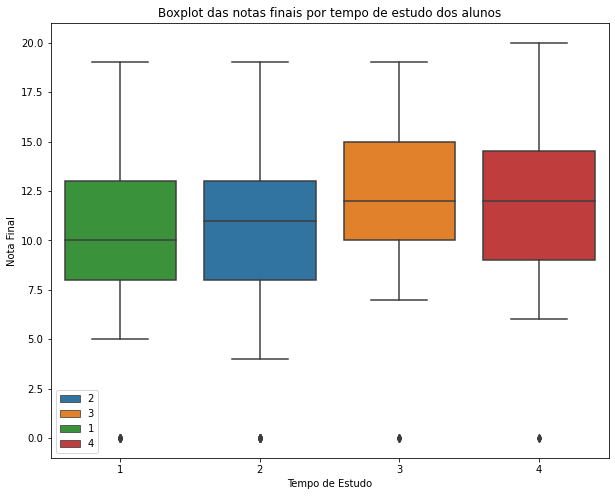

In [62]:
plt.figure(figsize = (10, 8))

print("Distribuição do tempo de estudo dos alunos\n")
print(df['studytime'].value_counts())

sns.boxplot(x = 'studytime', y = 'G3', data = df, hue = 'studytime', dodge=False, order = ['1', '2', '3', '4'])
plt.title('Boxplot das notas finais por tempo de estudo dos alunos')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Nota Final')
plt.legend()

plt.show()

Uma relação que, pelo senso comum, já era esperada se confirma com esses dados. Quando maior foi o tempo de estudo do aluno, maior foram as notas, ficando claro com o aumento da mediana entre as "caixas".

## Número de Faltas

<AxesSubplot:xlabel='absences', ylabel='G3'>

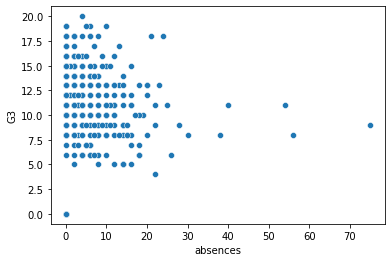

In [67]:
sns.scatterplot(x = 'absences', y = 'G3', data = df)

O gráfico acima mostra que não existe nenhuma relação linear entre o número de faltas do aluno com sua nota final. Apesar de que nenhum aluno com mais de 30 faltas tirou mais de 12,5 pontos, entre 0 e 10 faltas existem notas finais entre 5 e 20 pontos.

## Conclusão

- De modo geral, os alunos tiveram notas medianas entre 7,5 e 15,5;

- As notas finais dos alunos homens foram maiores do que das  alunas mulheres;

- A nota final média dos alunos de áreas urbanas foi maior do que das áreas rurais ;

- O tamanho da família não parece ter grande influência na nota final;

- Os pais serem separados ou casados parece não afetar o rendimento dos alunos em sala de aula, visto que a distribuição das notas foi bem similar entre os dois grupos;

- Quanto maior o nível de educação da mãe e do pai, maior foi a nota final média do aluno;

- Mães e pais que trabalha na área da saúde ou na educação os filhos tiveram uma nota final média maior que os outros casos;

- Quanto menor o tempo de viagem para a escola, melhor foram as notas;

- Quando maior foi o tempo de estudo do aluno, maior foram as nota;

- Não existe nenhuma relação linear entre o número de faltas do aluno com sua nota final.